[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\devri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\devri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


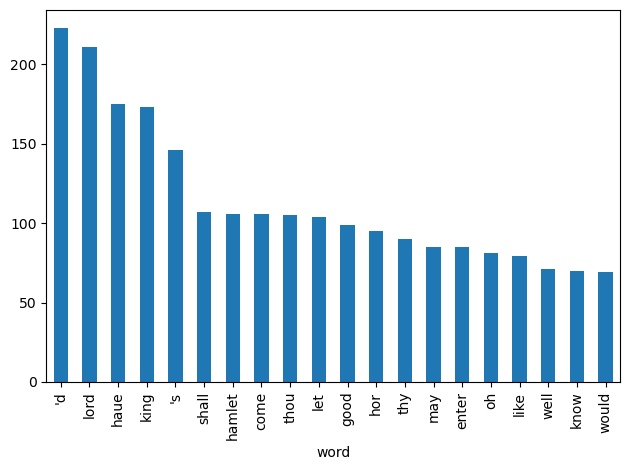

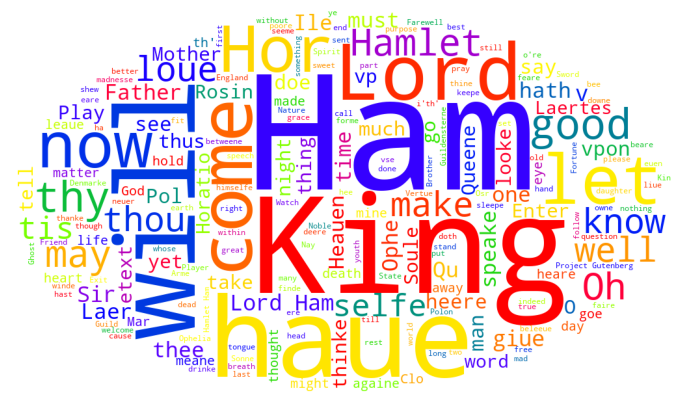

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

stop_words = stopwords.words('english')

import requests

target_url ='http://www.gutenberg.org/files/2265/2265.txt'

response = requests.get(target_url)

data = response.text

from textblob import TextBlob

from pathlib import Path

blob = TextBlob(data)


items = [word.lower() for word in blob.words if word.lower() not in stop_words]

word_counts = {}

for word in items:
    word_counts[word] = word_counts.get(word, 0) + 1

from operator import itemgetter

sort_words = sorted(word_counts.items(), key = itemgetter(1), reverse=True)

top_20 = sort_words[1:21]

import pandas as pd

df = pd.DataFrame(top_20, columns=['word', 'count'])

aces = df.plot.bar(x='word', y='count', legend=False)

import matplotlib.pyplot as plt

plt.gcf().tight_layout()

import imageio

image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"

mask_image =imageio.v3.imread(image_file)

from wordcloud import WordCloud

word_cloud = WordCloud(colormap='prism', mask=mask_image, background_color='white')

word_cloud = word_cloud.generate(data)

#word_cloud = word_cloud.to_file('gutenberg.png')

plt.figure(figsize=(10, 5)) 
plt.imshow(word_cloud)  
plt.axis('off')  
plt.show() 